In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import keras
import keras.backend

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(10)

/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(32, 32, 3)


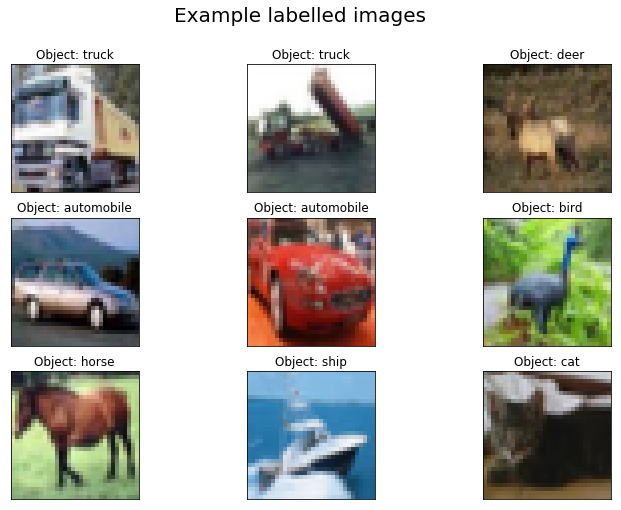

In [3]:
# load data
(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()
y2label = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# visualize first few labelled images
cols = 3
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(12, 8))
plt.suptitle("Example labelled images", fontsize=20)

image_num = 0
for row in range(rows): 
    for col in range(cols):
        image_num += 1
        ax[row][col].imshow(X_train[image_num], cmap='gray')
        ax[row][col].set_title("Object: %s" % y2label[y_train[image_num][0]])
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
plt.show()



In [10]:
# try classification with standard MLP from previous notebook

## convert images to grayscale
X_train_gray = X_train[:,:,:,0]*299/1000 + X_train[:,:,:,1]*587/1000 + X_train[:,:,:,2]*114/1000
X_valid_gray = X_valid[:,:,:,0]*299/1000 + X_valid[:,:,:,1]*587/1000 + X_valid[:,:,:,2]*114/1000

## preprocess images
num_pixels = X_train_gray.shape[1] * X_train_gray.shape[2]
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], num_pixels).astype('float32')
X_valid_gray = X_valid_gray.reshape(X_valid_gray.shape[0], num_pixels).astype('float32')

## preprocess labels
y_train_categorical = np_utils.to_categorical(y_train)
y_valid_categorical = np_utils.to_categorical(y_valid)
num_classes = y_valid_categorical.shape[1]

## create model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## train model
model.fit(X_train_gray, y_train_categorical, epochs=10, batch_size=100, verbose=1)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 14.4980 - acc: 0.1005 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
 - 15s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
 - 17s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
 - 17s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
 - 16s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
 - 16s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
 - 18s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/10
 - 17s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/10
 - 16s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/10
 - 17s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Test accuracy: 0.1


In [11]:
## evaluate model
scores = model.evaluate(X_valid_gray, y_valid_categorical, verbose=0)
print 'Test accuracy:', scores[1]

Test accuracy: 0.1


In [ ]:
# example of a convolutional neural network (cnn)
# [image above]
model = Sequential()
model.add(
            Conv2D(
                filters=32, 
                kernel_size=(5, 5), 
                strides=(1, 1),
                activation='relu',
                input_shape=input_shape
            )
)
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [68]:
# deep convolutional neural network for 
# cifar10 image classification

## re-load data
(X_train, y_train), (X_valid, y_valid) = cifar10.load_data()

## re-preprocess images and labels
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_train /= 255
X_valid /= 255
y_train_categorical = np_utils.to_categorical(y_train)
y_valid_categorical = np_utils.to_categorical(y_valid)
num_classes = y_valid_categorical.shape[1]

## create model
model = Sequential()
model.add(Conv2D(32, 
                 (3, 3), 
                 input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

sgd_optimzer = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd_optimzer, metrics=['accuracy'])

In [69]:
already_trained = True

if not already_trained:
    ## train model
    model.fit(X_train, y_train_categorical, epochs=20, batch_size=64, verbose=2)
    
    ## save model weights
    model.save("image_cnn_weights.h5")
    already_trained = True
    
else:
    ## load model weights
    model.load_weights("image_cnn.h5")

In [70]:
## evalute model
scores = model.evaluate(X_valid, y_valid_categorical, verbose=0)
print 'Validation accuracy:', scores[1]

Test accuracy: 0.622


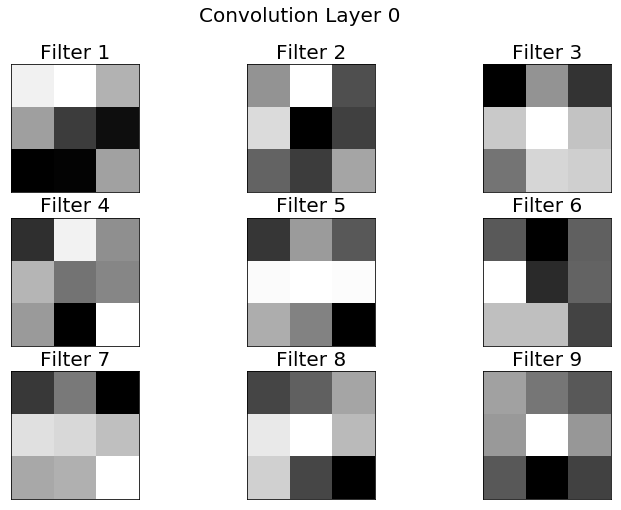

In [93]:
# visualize first 9 trained filters in a given layer
choose_layer = 0

layer_weights_2d = model.layers[choose_layer].get_weights()[0][:,:,0,:]

cols = 3
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(12, 8))
fig.suptitle("Layer %i" % choose_layer, fontsize=20)

filter_num = 0
for row in range(rows): 
    for col in range(cols):
        ax[row][col].imshow(layer_weights_2d[:,:,filter_num],cmap="gray")
        ax[row][col].set_title("Filter %i" % (filter_num+1), fontsize=12)
        ax[row][col].set_yticks([])
        ax[row][col].set_xticks([])
        filter_num += 1

plt.show()

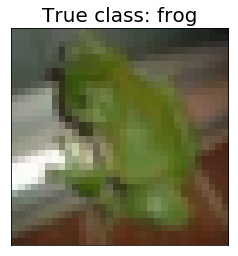

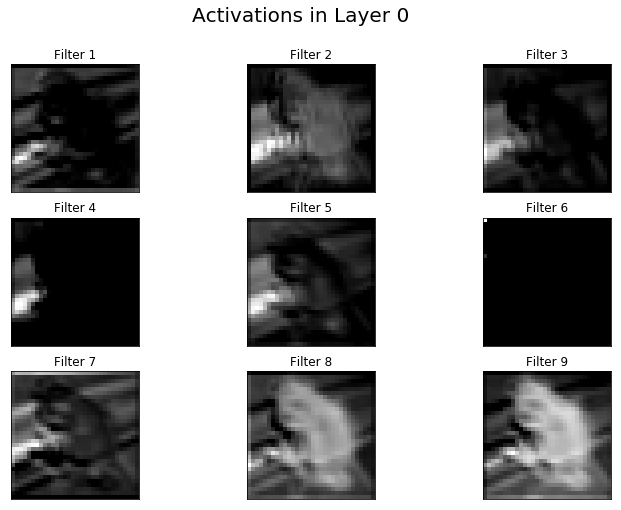

Predicted class: frog


In [120]:
# visualize first 9 filter activations 
# in a given hiden layer of an example image
from keras import backend

choose_layer = 0
choose_image = 7

## visualize validation image
example_image = X_valid[choose_image]
fig = plt.figure()
plt.imshow(test_image)
plt.title("True class: %s" % y2label[y_test[choose_image][0]], fontsize=20)
plt.yticks([])
plt.xticks([])

## compute all activations for test image 
## in given hidden layer
layer_fxn = backend.function(inputs=[model.input] + [backend.learning_phase()], 
                             outputs=[model.layers[choose_layer].output])
layer_outputs = layer_fxn([example_image.reshape(1,32,32,3), 1])
layer_activations = layer_outputs[0]

## visualize activations
cols = 3
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(12,8))
plt.suptitle("Activations in Layer %i" % choose_layer, fontsize=20)
filter_num = 0
for row in range(0, rows): 
    for col in range(0, cols):
        ax[row][col].imshow(layer_activations[0, :, :, filter_num], cmap='gray')
        ax[row][col].set_title("Filter %i" % (filter_num+1), fontsize=12)
        ax[row][col].set_yticks([])
        ax[row][col].set_xticks([])
        filter_num += 1

plt.show()

y_predicted = model.predict_classes(example_image.reshape(1,32,32,3))[0]
print "Predicted class: %s" % y2label[y_predicted]
        

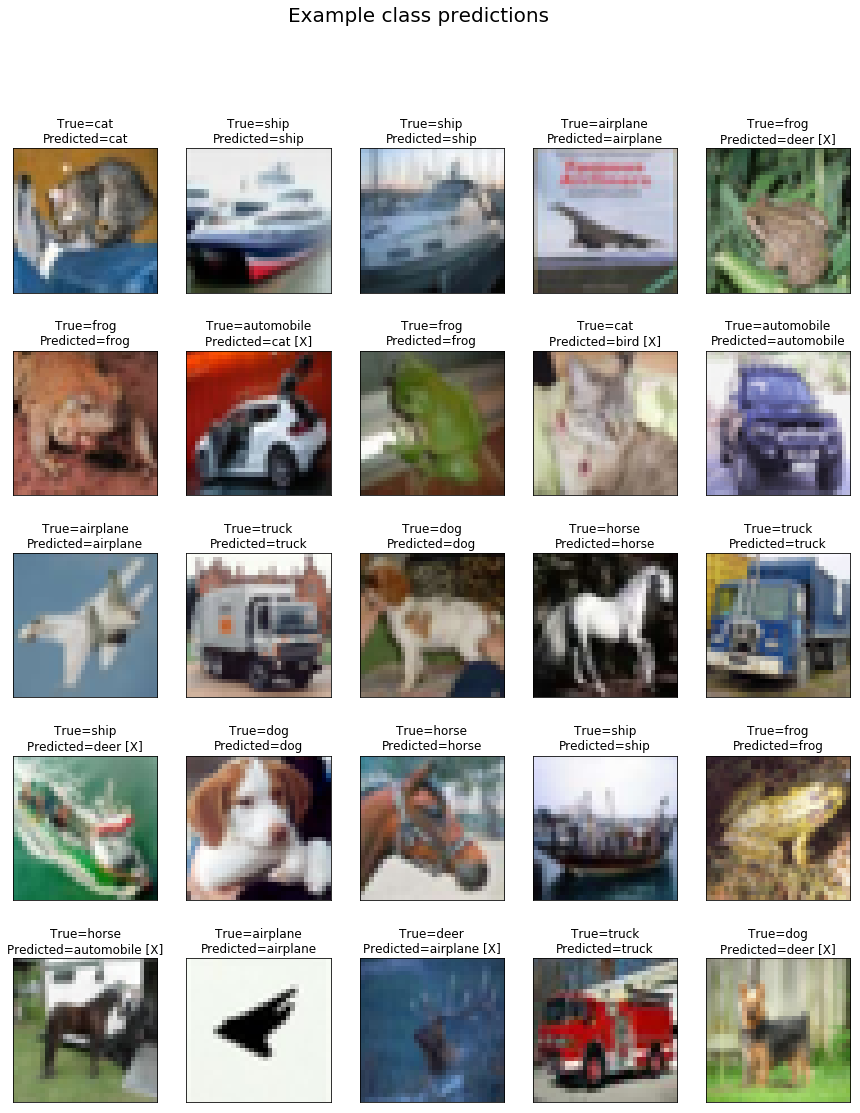

In [126]:
# visualize a few predictions on validation set
cols = 5
rows = 5
fig, ax = plt.subplots(rows, cols, figsize=(15, 18))
fig.suptitle("Predictions on validation data", fontsize=20)

image_num = 0
for row in range(0, rows): 
    for col in range(0, cols):
        y_true = y2label[y_valid[image_num][0]]
        y_predicted = y2label[model.predict_classes(X_valid[image_num].reshape(1,32,32,3))[0]]
        ax[row][col].imshow(X_test[image_num])
        title = "True=%s\nPredicted=%s" % (y_true, y_predicted)
        if y_true != y_predicted:
            title += " [X]"
        ax[row][col].set_title(title)
        ax[row][col].set_yticks([])
        ax[row][col].set_xticks([])
        image_num += 1

plt.show()

In [ ]:
# so far, we've only used validation data ... exercise: create a 
# test dataset. think of an area in social science that you're 
# interested in, download images and try to classify them using
# this classifier. how did it do? what could you do to improve 
# the classifier? 